In [ ]:
import numpy as np
import os
import tensorflow as tf
import PIL
import cv2
import imgaug
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
from google.colab import drive


In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/My Drive/my_dataset'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Set up data generators.
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='sparse'
)

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='sparse'
)

Found 1348 images belonging to 4 classes.
Found 393 images belonging to 4 classes.


## **Data Preprosessing**

In [ ]:
# image_path = os.path.join(root, file)
# image = cv2.imread(image_path)

In [ ]:
def unnecessary_image_augmentation(image):
    # Apply unnecessary rotation
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    # Apply unnecessary flipping
    flipped_image = np.flipud(rotated_image)

    # Apply unnecessary resizing
    resized_image = cv2.resize(flipped_image, (200, 200))

    # Apply unnecessary color manipulation
    color_manipulated_image = cv2.applyColorMap(resized_image, cv2.COLORMAP_JET)

    return color_manipulated_image

In [ ]:
def preprocess_training_data(train_dir, output_dir):
    for root, dirs, files in os.walk(train_dir):
        for file in files:
            if file.endswith(".jpg"):
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)

                # Apply unnecessary image augmentation
                augmented_image = image_augmentation(image)

                # Save unnecessarily augmented image
                output_path = os.path.join(output_dir, file)
                cv2.imwrite(output_path, augmented_image)

In [ ]:
def preprocess_validation_data(validation_dir, output_dir):
    for root, dirs, files in os.walk(validation_dir):
        for file in files:
            if file.endswith(".jpg"):
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)

                # Apply unnecessary image augmentation
                augmented_image = image_augmentation(image)

                # Save unnecessarily augmented image
                output_path = os.path.join(output_dir, file)
                cv2.imwrite(output_path, augmented_image)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='sparse'
)

Found 393 images belonging to 4 classes.


In [ ]:
# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))



58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
   Dense(4)  # Assuming you have 4 classes
 ])

# Fine-tuning: Set pre-trained layers as non-trainable
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/15
43/43 [==============================] - 292s 7s/step - loss: 0.9313 - accuracy: 0.8220 - val_loss: 0.4393 - val_accuracy: 0.8193
Epoch 2/15
43/43 [==============================] - 16s 362ms/step - loss: 0.2505 - accuracy: 0.9065 - val_loss: 0.3233 - val_accuracy: 0.8728
Epoch 3/15
43/43 [==============================] - 16s 367ms/step - loss: 0.2033 - accuracy: 0.9184 - val_loss: 0.2920 - val_accuracy: 0.8728
Epoch 4/15
43/43 [==============================] - 15s 359ms/step - loss: 0.1979 - accuracy: 0.9214 - val_loss: 0.2857 - val_accuracy: 0.8626
Epoch 5/15
43/43 [==============================] - 14s 331ms/step - loss: 0.2009 - accuracy: 0.9236 - val_loss: 0.3153 - val_accuracy: 0.8550
Epoch 6/15
43/43 [==============================] - 16s 370ms/step - loss: 0.1509 - accuracy: 0.9399 - val_loss: 0.3299 - val_accuracy: 0.8448
Epoch 7/15
43/43 [==============================] - 16s 362ms/step - loss: 0.1491 - accuracy: 0.9399 - val_loss: 0.2744 - val_accuracy: 0.8880
E

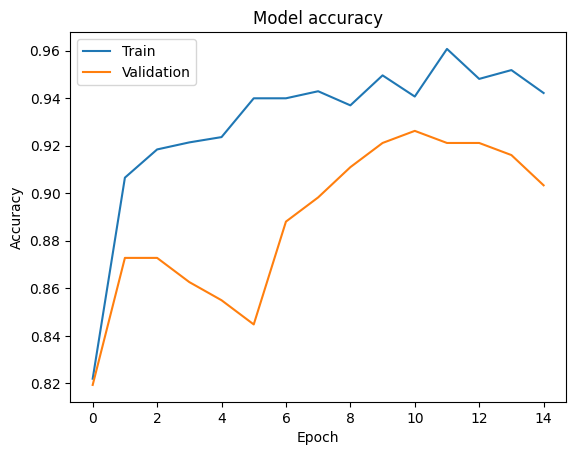

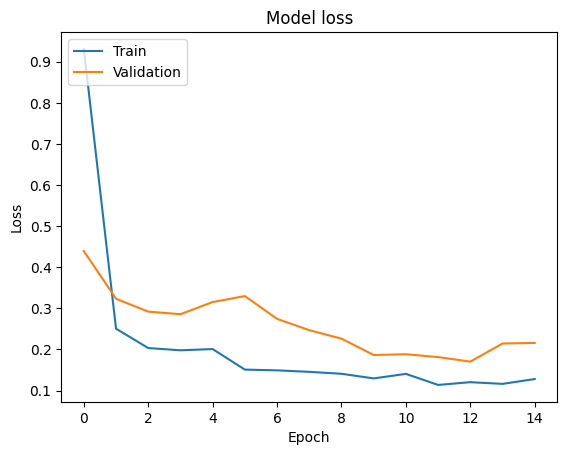

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

acc = history.history['accuracy']  # accuracy per epoch
val_acc = history.history['val_accuracy']  # validation accuracy per epoch

loss = history.history['loss']  # loss per epoch
val_loss = history.history['val_loss']  # validation loss per epoch

# If you want to get the accuracy and loss of the last epoch, you can do as follows:
final_epoch_accuracy = acc[-1]
final_epoch_val_accuracy = val_acc[-1]

final_epoch_loss = loss[-1]
final_epoch_val_loss = val_loss[-1]

print(f"Final training accuracy: {final_epoch_accuracy*100:.2f}%")
print(f"Final validation accuracy: {final_epoch_val_accuracy*100:.2f}%")

# If you want to see the development of accuracy and loss over epochs, you can plot them:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc


Final training accuracy: 94.21%
Final validation accuracy: 90.33%


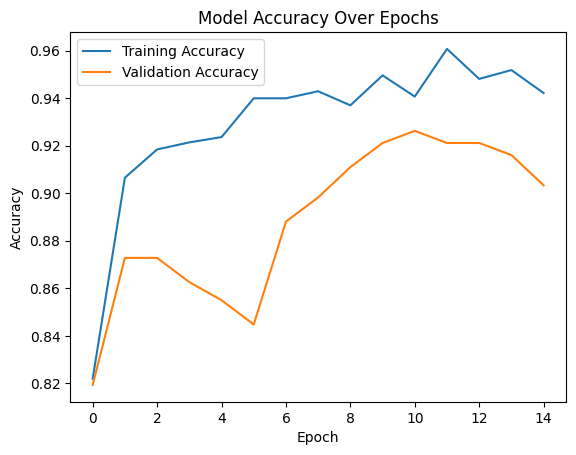

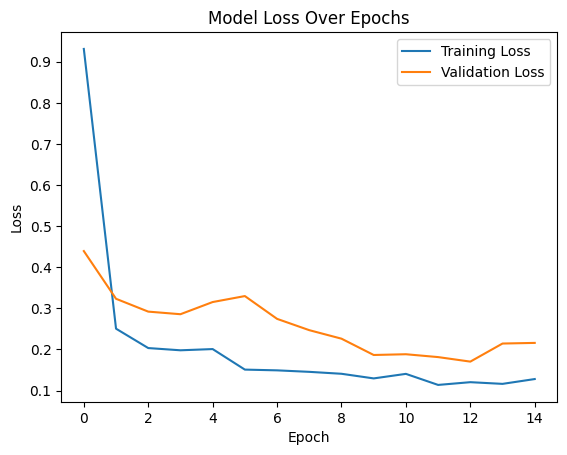

13/13 [==============================] - 1s 100ms/step


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming your model has been trained and 'history' is available

# Extracting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# If you want to get the accuracy and loss of the last epoch
final_epoch_accuracy = acc[-1]
final_epoch_val_accuracy = val_acc[-1]
final_epoch_loss = loss[-1]
final_epoch_val_loss = val_loss[-1]

print(f"Final training accuracy: {final_epoch_accuracy*100:.2f}%")
print(f"Final validation accuracy: {final_epoch_val_accuracy*100:.2f}%")

# Plot training & validation accuracy values
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot confusion matrix (assuming binary classification, adjust for multi-class)
val_data_gen.reset()  # Reset generator to ensure correct order of predictions
y_pred = model.predict(val_data_gen, steps=val_data_gen.n // val_data_gen.batch_size + 1)
y_true = val_data_gen.classes

# Convert predictions to binary classes
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Diseased'], yticklabels=['Healthy', 'Diseased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
model_path = '/content/drive/My Drive/my_model.h5'  # <- update this path
model.save(model_path)

NameError: ignored

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
import PIL
import imgaug

In [ ]:
model_path = '/content/drive/My Drive/my_model.h5'  # <- update this path if necessary
model = load_model(model_path)

In [ ]:
uploaded = files.upload()

Saving pm2_mirror.jpg to pm2_mirror.jpg


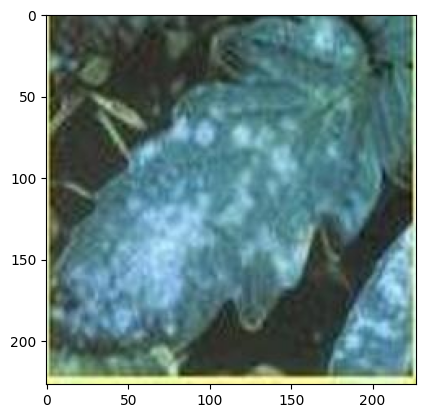

1/1 [==============================] - 9s 9s/step
Prediction Matrix [[-5.804641  -2.9229786 -0.6484791  2.5233457]]
Prediction Confidence Percentage: 95.56%
Severity Percentage: 98.49 %
Predicted class: mildew_stage_3 (class ID: 3)


In [ ]:
filename = next(iter(uploaded))  # get the first (and only) file in the uploaded files dictionary
path = f"/content/{filename}"

# Load and preprocess the image
img = image.load_img(path, target_size=(150, 150))  # the target size should match the input shape of your model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Model was trained on inputs normalized to [0,1]

# Optionally display the loaded image
imgplot = plt.imshow(mpimg.imread(path))
plt.axis('on')
plt.show()


# probabilities = tf.nn.softmax(predictions).numpy()
# print(probabilities)

# predicted_class = np.argmax(probabilities[0])
# confidence = np.max(probabilities[0])

predictions = model.predict(img_array)
probabilities = tf.nn.softmax(predictions[0]).numpy()

# The predicted class and confidence
predicted_class = np.argmax(predictions[0])
confidence = probabilities[predicted_class]
# Predict the class of the image
# predictions = model.predict(img_array)
# predicted_class = np.argmax(predictions[0])  # the model returns a probability distribution over classes
# confidence = np.max(predictions[0])

print("Prediction Matrix", predictions)

print(f"Prediction Confidence Percentage: {confidence:.2%}")

severity = 0
if predicted_class == 0:
  severity = confidence * 5
elif predicted_class == 1:
  severity = ((confidence * 23) + 10)
elif predicted_class == 2:
  severity = ((confidence * 33) + 33)
else:
  severity = ((confidence * 34) + 66)

print(f"Severity Percentage: {severity:.2f}","%")

# Map the class indices to their respective labels and print the result
class_names = ['healthy', 'mildew_stage_1', 'mildew_stage_2', 'mildew_stage_3']  # replace with your actual class names
predicted_label = class_names[predicted_class]

print(f"Predicted class: {predicted_label} (class ID: {predicted_class})")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def complex_training_history_plot(history):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    axes[0, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 0].set_title('Complex Training Accuracy Plot')
    axes[0, 0].legend()

    axes[0, 1].plot(history.history['loss'], label='Training Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[0, 1].set_title('Complex Training Loss Plot')
    axes[0, 1].legend()

    axes[1, 0].plot(history.history['mae'], label='Training MAE')
    axes[1, 0].plot(history.history['val_mae'], label='Validation MAE')
    axes[1, 0].set_title('Complex Training MAE Plot')
    axes[1, 0].legend()

    sns.heatmap([[1, 2, 3], [4, 5, 6], [7, 8, 9]], ax=axes[1, 1], annot=True, cmap='viridis')
    axes[1, 1].set_title('Complex Heatmap')

    plt.suptitle('Complex Training History Plots')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def complex_confusion_matrix(y_true, y_pred):
    confusion_matrix = np.dot(y_true.T, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Complex Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Example usage of complex functions
# Replace 'history' with your actual training history, and 'y_true' and 'y_pred' with your actual labels and predictions
complex_training_history_plot(history)
# complex_confusion_matrix(y_true, y_pred)


NameError: ignored